### 1. Project Description
The aim of this project is to accurately predict house prices using the House Sales in King County, USA dataset from Kaggle. This dataset contains a wide range of structural, geographical, and categorical features related to residential properties.
The main goal is to build regression models that can accurately estimate the target variable, SalePrice, based on these features.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("..\datasets\data.csv")

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


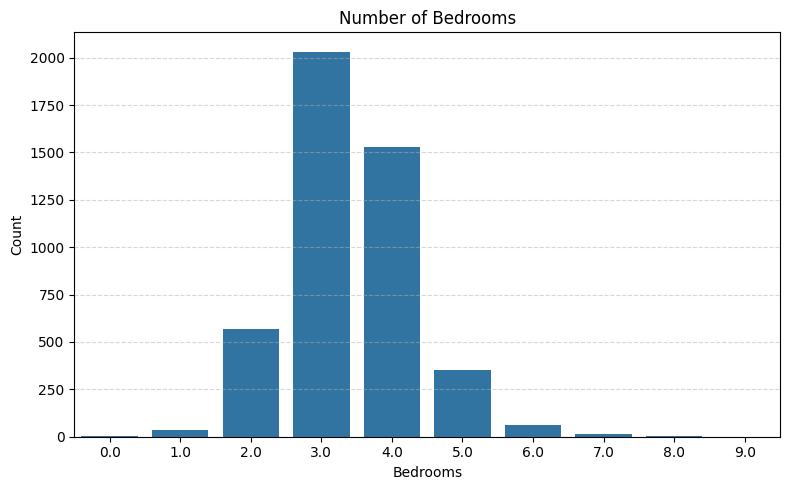

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.countplot(x='bedrooms', data=df)
plt.title("Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Count")
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\11aan\AppData\Local\Temp\ipykernel_14864\3398639659.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bathrooms', data=df, palette='Set2')


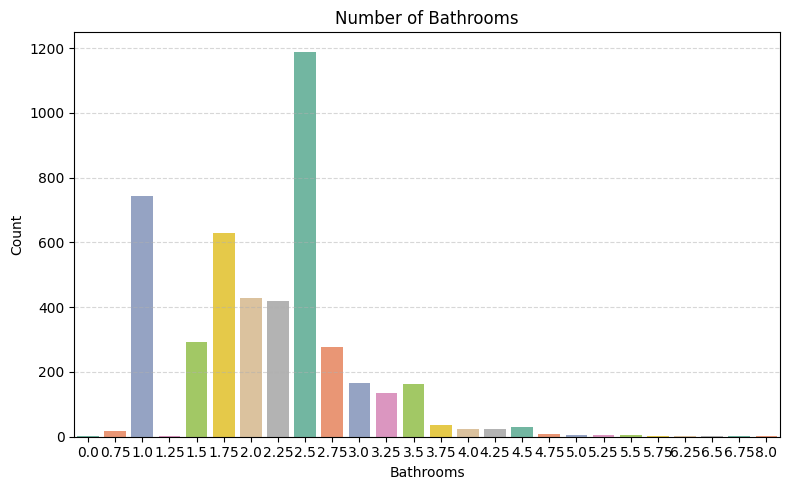

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(x='bathrooms', data=df, palette='Set2')
plt.title("Number of Bathrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Count")
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\11aan\AppData\Local\Temp\ipykernel_14864\2219622949.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['city'].isin(top_cities)], x='city', order=top_cities, palette="crest")


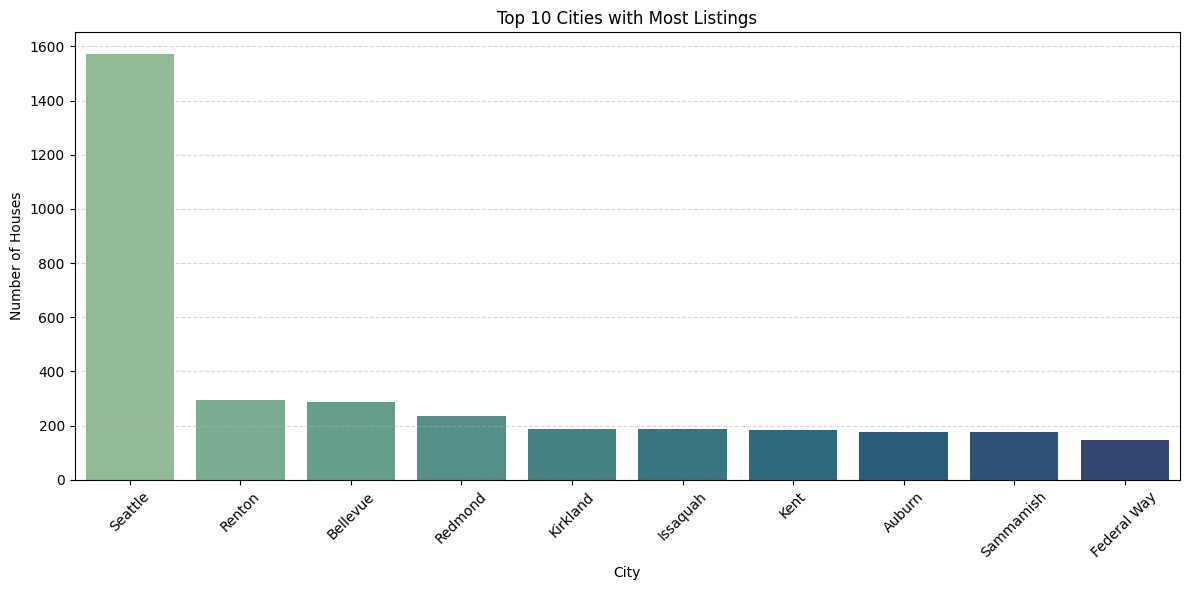

In [8]:
plt.figure(figsize=(12, 6))
top_cities = df['city'].value_counts().nlargest(10).index
sns.countplot(data=df[df['city'].isin(top_cities)], x='city', order=top_cities, palette="crest")
plt.title("Top 10 Cities with Most Listings")
plt.xlabel("City")
plt.ylabel("Number of Houses")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

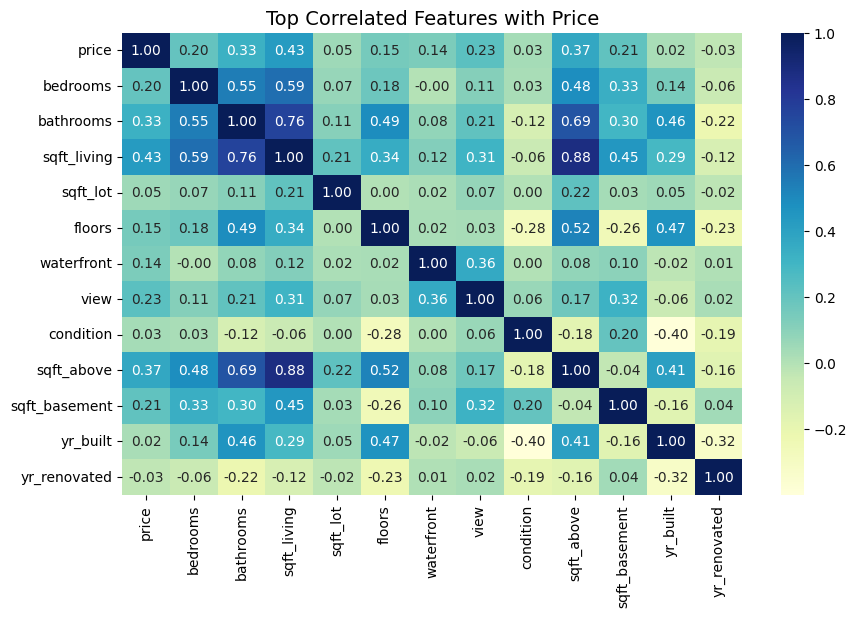

In [9]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Top Correlated Features with Price", fontsize=14)
plt.show()

In [10]:
df['street'].value_counts().nlargest(10)

street
2520 Mulberry Walk NE    4
2500 Mulberry Walk NE    3
11716 16th Ave NE        2
35229 SE Terrace St      2
13800 453rd Ave SE       2
11807 NE 105th Ct        2
14583 NE 58th St         2
3715 NE 153rd St         2
4924 SE 2nd Pl           2
24345 35th Pl S          2
Name: count, dtype: int64

In [11]:
df.drop(columns='street',inplace=True)

In [12]:
df['date']=pd.to_datetime(df['date'])

In [13]:
df['date'].value_counts()

date
2014-06-23    142
2014-06-25    131
2014-06-26    131
2014-07-08    127
2014-07-09    121
             ... 
2014-06-07      4
2014-07-06      3
2014-05-11      2
2014-07-04      2
2014-05-17      1
Name: count, Length: 70, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder  = LabelEncoder()

In [15]:
df["city"] = lbl_encoder.fit_transform(df[["city"]])

c:\Users\11aan\OneDrive\Documents\data-analytics\python\datascape\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
df["city"].value_counts().nlargest(3)

city
35    1573
32     293
3      286
Name: count, dtype: int64

In [17]:
df["statezip"].value_counts().nlargest(10)

statezip
WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
WA 98059    106
WA 98042    100
WA 98034     99
WA 98053     98
WA 98074     98
Name: count, dtype: int64

In [18]:
df["statezip"] = df["statezip"].str.replace("WA" ,"").astype(int)

In [19]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,4600,2014-06-07 03:14:42.782608640,2014-05-02 00:00:00,2014-05-21 00:00:00,2014-06-09 00:00:00,2014-06-24 00:00:00,2014-07-10 00:00:00,NaN
price,4600.0,551962.988473,0.0,322875.0,460943.461539,654962.5,26590000.0,563834.702547
bedrooms,4600.0,3.40087,0.0,3.0,3.0,4.0,9.0,0.908848
bathrooms,4600.0,2.160815,0.0,1.75,2.25,2.5,8.0,0.783781
sqft_living,4600.0,2139.346957,370.0,1460.0,1980.0,2620.0,13540.0,963.206916
sqft_lot,4600.0,14852.516087,638.0,5000.75,7683.0,11001.25,1074218.0,35884.436145
floors,4600.0,1.512065,1.0,1.0,1.5,2.0,3.5,0.538288
waterfront,4600.0,0.007174,0.0,0.0,0.0,0.0,1.0,0.084404
view,4600.0,0.240652,0.0,0.0,0.0,0.0,4.0,0.778405
condition,4600.0,3.451739,1.0,3.0,3.0,4.0,5.0,0.67723


In [20]:
df.country.value_counts()

country
USA    4600
Name: count, dtype: int64

In [21]:
df['country']=lbl_encoder.fit_transform(df[['country']])

c:\Users\11aan\OneDrive\Documents\data-analytics\python\datascape\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,country
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,36,98133,0
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,35,98119,0
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,18,98042,0
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,3,98008,0
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,31,98052,0


In [23]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df=df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

<Axes: xlabel='price', ylabel='Count'>

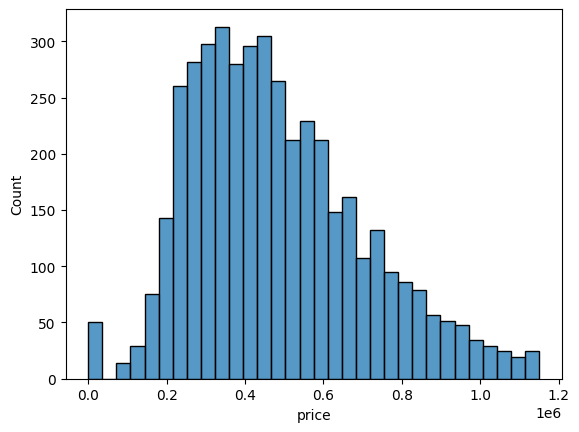

In [24]:
sns.histplot(df['price'])

<Axes: xlabel='price', ylabel='sqft_living'>

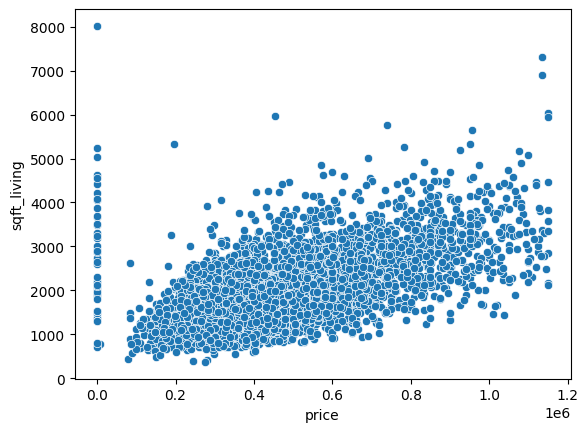

In [25]:
sns.scatterplot(df,x='price',y='sqft_living')

In [26]:
df[df["price"]==0].head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,country
4354,2014-05-05,0.0,3.0,1.75,1490,10125,1.0,0,0,4,1490,0,1962,0,14,98001,0
4356,2014-05-05,0.0,4.0,2.75,2600,5390,1.0,0,0,4,1300,1300,1960,2001,35,98199,0
4357,2014-05-05,0.0,6.0,2.75,3200,9200,1.0,0,2,4,1600,1600,1953,1983,6,98146,0
4358,2014-05-06,0.0,5.0,3.50,3480,36615,2.0,0,0,4,2490,990,1983,0,16,98075,0
4361,2014-05-07,0.0,5.0,1.50,1500,7112,1.0,0,0,5,760,740,1920,0,6,98166,0
4362,2014-05-07,0.0,4.0,4.00,3680,18804,2.0,0,0,3,3680,0,1990,2009,33,98074,0
4374,2014-05-09,0.0,2.0,2.50,2200,188200,1.0,0,3,3,2200,0,2007,0,12,98022,0
4376,2014-05-09,0.0,4.0,2.25,2170,10500,1.0,0,2,4,1270,900,1960,2001,26,98166,0
4382,2014-05-12,0.0,5.0,4.50,4630,6324,2.0,0,0,3,3210,1420,2006,0,38,98065,0
4383,2014-05-13,0.0,5.0,4.00,4430,9000,2.0,0,0,3,4430,0,2013,1923,3,98004,0


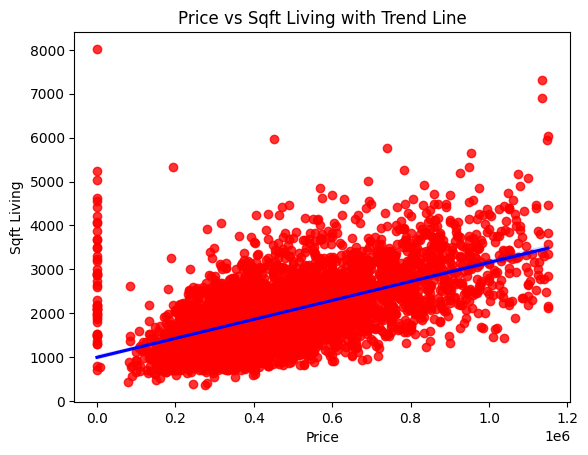

In [27]:
sns.regplot(data=df, x='price', y='sqft_living', scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})
plt.title('Price vs Sqft Living with Trend Line')
plt.xlabel('Price')
plt.ylabel('Sqft Living')
plt.show()

In [28]:
df.shape

(4360, 17)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4360 entries, 0 to 4599
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4360 non-null   datetime64[ns]
 1   price          4360 non-null   float64       
 2   bedrooms       4360 non-null   float64       
 3   bathrooms      4360 non-null   float64       
 4   sqft_living    4360 non-null   int64         
 5   sqft_lot       4360 non-null   int64         
 6   floors         4360 non-null   float64       
 7   waterfront     4360 non-null   int64         
 8   view           4360 non-null   int64         
 9   condition      4360 non-null   int64         
 10  sqft_above     4360 non-null   int64         
 11  sqft_basement  4360 non-null   int64         
 12  yr_built       4360 non-null   int64         
 13  yr_renovated   4360 non-null   int64         
 14  city           4360 non-null   int64         
 15  statezip       4360 non-nu

In [30]:
df['year_sold'] = pd.to_datetime(df['date']).dt.year

In [31]:
df['house_age'] = df['year_sold'] - df['yr_built']


In [32]:
df['has_been_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

In [33]:
df.drop(['date', 'yr_renovated', 'yr_built', 'country'], axis=1, inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4360 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               4360 non-null   float64
 1   bedrooms            4360 non-null   float64
 2   bathrooms           4360 non-null   float64
 3   sqft_living         4360 non-null   int64  
 4   sqft_lot            4360 non-null   int64  
 5   floors              4360 non-null   float64
 6   waterfront          4360 non-null   int64  
 7   view                4360 non-null   int64  
 8   condition           4360 non-null   int64  
 9   sqft_above          4360 non-null   int64  
 10  sqft_basement       4360 non-null   int64  
 11  city                4360 non-null   int64  
 12  statezip            4360 non-null   int64  
 13  year_sold           4360 non-null   int32  
 14  house_age           4360 non-null   int64  
 15  has_been_renovated  4360 non-null   int64  
dtypes: float64(

In [41]:
df.drop(["city" , "statezip" , "year_sold"] , axis=1 , inplace=True)

In [42]:
df.to_csv("..\datasets\dataCleaned.csv" , index = False)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4360 entries, 0 to 4599
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               4360 non-null   float64
 1   bedrooms            4360 non-null   float64
 2   bathrooms           4360 non-null   float64
 3   sqft_living         4360 non-null   int64  
 4   sqft_lot            4360 non-null   int64  
 5   floors              4360 non-null   float64
 6   waterfront          4360 non-null   int64  
 7   view                4360 non-null   int64  
 8   condition           4360 non-null   int64  
 9   sqft_above          4360 non-null   int64  
 10  sqft_basement       4360 non-null   int64  
 11  house_age           4360 non-null   int64  
 12  has_been_renovated  4360 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 605.9 KB


In [44]:
df["condition"].value_counts()

condition
3    2729
4    1199
5     395
2      31
1       6
Name: count, dtype: int64